# AE 370 Group Project 1

### 3 Dimensions, 9 Bodies

In [2]:
import numpy as np

def f_true_new(u0, m, G=6.67430e-11):
    """
    u = 2D array of current positions and velocities of bodies
    
    m = 1D array of masses
    """
    if u0.shape[1] != m.shape[0]:
        print('Error: Number of bodies does not match in U and m arrays.')
        return None
    else:
        
        n_col = u0.shape[1]
        n_row = 6
    
        u1 = np.zeros(u0.shape)
        
        for i in range(n_row):
            for j in range(n_col):
                
                if i <= 2:
                    u1[i,j] = u0[i+3,j]
                    
                else:
                    v = 0
                    for k in range(n_col):
                        
                        if k != j:
                            r1 = np.array([u0[0,j], u0[1,j], u0[2,j]])
                            r2 = np.array([u0[0,k], u0[1,k], u0[2,k]])
                            r21 = r2 - r1
                            r21_mag = np.sqrt(r21[0]**2 + r21[1]**2 + r21[2]**2)
                            v += G*m[k]*r21[i-3]/r21_mag**3
                    u1[i,j] = v
                            
    return u1
        

In [3]:
def rk4_new(u0, m, delta_t):
    y1 = f_true_new(u0, m)
    y2 = f_true_new(u0 + delta_t/2*y1, m)
    y3 = f_true_new(u0 + delta_t/2*y2, m)
    y4 = f_true_new(u0 + delta_t*y3, m)
    
    u1 = u0 + delta_t/6*(y1+2*y2+2*y3+y4)
    
    return u1

In [4]:
def ivp_rk4_new(u0, m, T, delta_t):
    
    K = int(T/delta_t+1)
    n_row = u0.shape[1]
    n_col = u0.shape[2]
    u = np.zeros((K,n_row, n_col))
    times = np.zeros((K,1))
    
    u[0,:,:] = u0[0,:,:]
    
    for i in range(0,K-1):
        u[i+1,:,:] = rk4_new(u[i,:,:], m, delta_t)
        times[i] = i*delta_t
        
    return u, times

In [5]:
import matplotlib.pyplot as plt

T = 60*60*24*365*30
delta_t = 86400

m = np.array([1.9891e30, 3.30103e23, 4.8673e24, 5.97219e24, 6.41693e23, 1.89813e27, 5.683e26, 8.681e25, 1.0241e26, 5000])
u0 = np.array([[[0, 4.218547776926628e10, -2.880247278248210e9, -1.489367005357467e11, -1.452225829003665e11, 6.972652198198949e11, 1.252037401674433e12, 1.964053522629884e12, 4.455513106254126e12, -1.489367005357467e11 - 7e6], 
                [0, 2.429304172695987e10, 1.075937807557366e11, -7.206800325768847e9, 1.982282617940946e11, 2.497499384680446e11, -7.660471572209232e11, 2.188617683440142e12, -4.015647236140136e11, -7.206800325768847e9 - 7e6], 
                [0, -1.884220417503184e9, 1.643387845774136e9, 1.203277293410152e6, 7.716734755059928e9, -1.663748878034543e10, -3.650676027065593e10, -1.733103475378466e10, -9.441135024495748e10, 1.203277293410152e6], 
                [0, -3.382900856110860e4, -3.512808926176822e4, 9.616643626998167e2, -1.863015592458860e4, -4.561917928382658e3, 4.502960155732291e3, -5.123316496884265e3, 4.486044149880534e2, -1.616643626998167e4], 
                [0, 4.435019216730311e4, -1.122560850159112e3, -2.987858989645234e4, -1.225724886921267e4, 1.292765711268781e4, 8.234134471385742e3, 4.244539871477413e3, 5.460547817565847e3, -1.587858989645234e4], 
                [0, 6.727263396142869e3, 2.011571733644511e3, 4.039355930913757e-1, 2.001015393882497e2, 4.839156710104486e1, -3.227685562098905e2, 8.177808764903882e1, -1.224718468543844e2, -2.039355930913757e3]]])




# index 9
u0[0, 3, 9] = -7.616643626998167e4
u0[0, 4, 9] = -6.587858989645234e4
u0[0, 5, 9] = -5.039355930913757e3

u_rk4, times_rk4 = ivp_rk4_new(u0, m, T, delta_t)

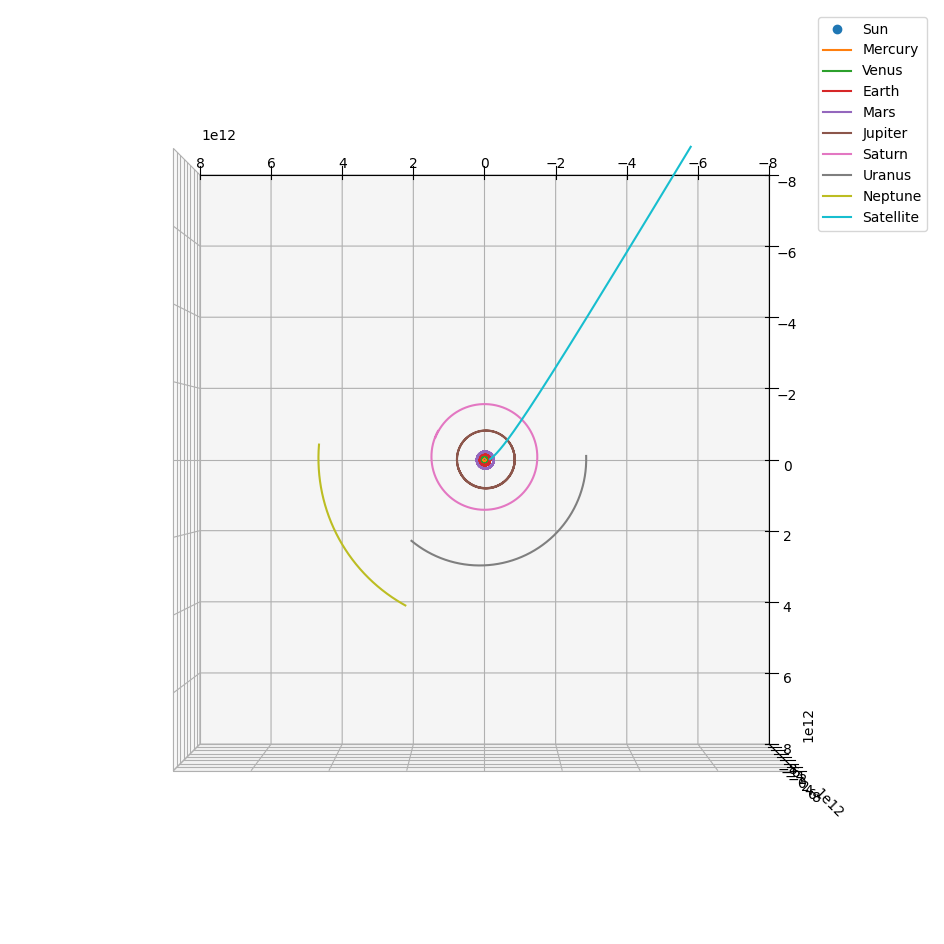

In [11]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
plt.plot(u_rk4[:,0,0], u_rk4[:,1,0], u_rk4[:,2,0], 'o', label="Sun")
plt.plot(u_rk4[:,0,1], u_rk4[:,1,1], u_rk4[:,2,1], label="Mercury")
plt.plot(u_rk4[:,0,2], u_rk4[:,1,2], u_rk4[:,2,2], label="Venus")
plt.plot(u_rk4[:,0,3], u_rk4[:,1,3], u_rk4[:,2,3], label="Earth")
plt.plot(u_rk4[:,0,4], u_rk4[:,1,4], u_rk4[:,2,4], label="Mars")
plt.plot(u_rk4[:,0,5], u_rk4[:,1,5], u_rk4[:,2,5], label="Jupiter")
plt.plot(u_rk4[:,0,6], u_rk4[:,1,6], u_rk4[:,2,6], label="Saturn")
plt.plot(u_rk4[:,0,7], u_rk4[:,1,7], u_rk4[:,2,7], label="Uranus")
plt.plot(u_rk4[:,0,8], u_rk4[:,1,8], u_rk4[:,2,8], label="Neptune")
plt.plot(u_rk4[:,0,9], u_rk4[:,1,9], u_rk4[:,2,9], label="Satellite")
bound = 80e11
plt.xlim(-bound, bound)
plt.ylim(-bound, bound)
ax.set_zlim3d(-bound,bound)
plt.legend()
ax.view_init(90,90)

In [6]:
import matplotlib.pyplot as plt

T = 60*60*24*365*0.061
delta_t = 86400

m = np.array([1.9891e30, 3.30103e23, 4.8673e24, 5.97219e24, 6.41693e23, 1.89813e27, 5.683e26, 8.681e25, 1.0241e26, 5000])
u0 = np.array([[[0, 4.218547776926628e10, -2.880247278248210e9, -1.489367005357467e11, -1.452225829003665e11, 6.972652198198949e11, 1.252037401674433e12, 1.964053522629884e12, 4.455513106254126e12, -1.489367005357467e11 - 7e6], 
                [0, 2.429304172695987e10, 1.075937807557366e11, -7.206800325768847e9, 1.982282617940946e11, 2.497499384680446e11, -7.660471572209232e11, 2.188617683440142e12, -4.015647236140136e11, -7.206800325768847e9 - 7e6], 
                [0, -1.884220417503184e9, 1.643387845774136e9, 1.203277293410152e6, 7.716734755059928e9, -1.663748878034543e10, -3.650676027065593e10, -1.733103475378466e10, -9.441135024495748e10, 1.203277293410152e6], 
                [0, -3.382900856110860e4, -3.512808926176822e4, 9.616643626998167e2, -1.863015592458860e4, -4.561917928382658e3, 4.502960155732291e3, -5.123316496884265e3, 4.486044149880534e2, -3.5e3], 
                [0, 4.435019216730311e4, -1.122560850159112e3, -2.987858989645234e4, -1.225724886921267e4, 1.292765711268781e4, 8.234134471385742e3, 4.244539871477413e3, 5.460547817565847e3, 9.9e3], 
                [0, 6.727263396142869e3, 2.011571733644511e3, 4.039355930913757e-1, 2.001015393882497e2, 4.839156710104486e1, -3.227685562098905e2, 8.177808764903882e1, -1.224718468543844e2, 7.9e3]]])

u_rk4, times_rk4 = ivp_rk4_new(u0, m, T, delta_t)


In [7]:
def differences(u_rk4_new, u_rk4):
    i = 0
    storex = []
    storey = []
    storez = []
    while i in range(len(u_rk4_new)):
        differencex = u_rk4_new[i,0,1:9]/u_rk4[i,0,1:9]
        differencey = u_rk4_new[i,1,1:9]/u_rk4[i,1,1:9]
        differencez = u_rk4_new[i,2,1:9]/u_rk4[i,2,1:9]

        storex.append(differencex)
        storey.append(differencey)
        storez.append(differencez)
        i = i+1
    return(np.mean((storex),0)*100, np.mean((storey),0)*100 ,np.mean(storez,0)*100)

In [8]:
import matplotlib.pyplot as plt

T = 60*60*24*365*10
delta_t = 86400

m = np.array([1.9891e30, 3.30103e23, 4.8673e24, 5.97219e24, 6.41693e23, 1.89813e27, 5.683e26, 8.681e25, 1.0241e26])
u0 = np.array([[[0, 4.218547776926628e10, -2.880247278248210e9, -1.489367005357467e11, -1.452225829003665e11, 6.972652198198949e11, 1.252037401674433e12, 1.964053522629884e12, 4.455513106254126e12], 
                [0, 2.429304172695987e10, 1.075937807557366e11, -7.206800325768847e9, 1.982282617940946e11, 2.497499384680446e11, -7.660471572209232e11, 2.188617683440142e12, -4.015647236140136e11], 
                [0, -1.884220417503184e9, 1.643387845774136e9, 1.203277293410152e6, 7.716734755059928e9, -1.663748878034543e10, -3.650676027065593e10, -1.733103475378466e10, -9.441135024495748e10], 
                [0, -3.382900856110860e4, -3.512808926176822e4, 9.616643626998167e2, -1.863015592458860e4, -4.561917928382658e3, 4.502960155732291e3, -5.123316496884265e3, 4.486044149880534e2], 
                [0, 4.435019216730311e4, -1.122560850159112e3, -2.987858989645234e4, -1.225724886921267e4, 1.292765711268781e4, 8.234134471385742e3, 4.244539871477413e3, 5.460547817565847e3], 
                [0, 6.727263396142869e3, 2.011571733644511e3, 4.039355930913757e-1, 2.001015393882497e2, 4.839156710104486e1, -3.227685562098905e2, 8.177808764903882e1, -1.224718468543844e2]]])

u_rk4_none, times_rk4 = ivp_rk4_new(u0, m, T, delta_t)
print(differences(u_rk4, u_rk4_none))

(array([100., 100., 100., 100., 100., 100., 100., 100.]), array([100., 100., 100., 100., 100., 100., 100., 100.]), array([100., 100., 100., 100., 100., 100., 100., 100.]))
